# Proyecto Modelos 1
## Isaac Jimenez y Sebastian Aristizabal
## FASE 1. Modelo predictivo
Escoge un challenge de Kaggle. Mejor si es una competición y no un dataset, ya que las competiciones son más completas y tienen más contribuciones de código. Se recomiendo escoger algún dataset relacionado con el transporte personal (Taxis, Uber, etc.), para que haya una posibilidad futura de ser integrado en los proyectos de la Escuela de Software. Pero no es obligatorio.

Desarrolla o replica un modelo predictivo para el challenge. Puedes desarrollarlo tú mismo, o puedes seleccionar algún modelo que alguien ya haya realizado mirando la parte de code de Kaggle.

No te preocupes si las predicciones no son muy precisas. Lo importante es que emita predicciones.

## Entrega Fase 1
Tendrás que entregar tu proyecto en un repositorio de github, que contenga:

Un directorio fase-1, con al menos n notebook que muestre cómo se entrena y se predice con el modelo

## Evaluacion
Para cada fase se evaluará:

10% que los elementos de la entrega estén presentes (ficheros, github, etc.)

50% que siguiendo el README.md se ejecuten correctamente los elementos de las entregas. Se seguirán paso a paso las instrucciones. Se penalizará cualquier paso que haya que dar que no esté descrito en el fichero.

40% que tanto el notebook, como los scripts como los dockerfiles estén bien documentados. Es decir:

Que el notebook explique brevemente qué hace cada celda.

Que los scripts y las funciones tengan sus correspondientes docstrings

Que los dockerfiles tengan un comentario adjunto a cada línea de código.


https://www.kaggle.com/competitions/rossmann-store-sales/overview


In [ ]:
import os
import pandas as pd

In [ ]:
# Para especificar la ruta del token kaggle.son
os.environ["KAGGLE_CONFIG_DIR"] = "."

In [ ]:
# Para importar los archivos de la competicion desde kaggle, se debe tener el token kaggle.son subido
!kaggle competitions download -c rossmann-store-sales

 72% 5.00M/6.99M [00:00<00:00, 46.9MB/s]
100% 6.99M/6.99M [00:00<00:00, 60.7MB/s]


In [ ]:
# Para descomprimir los archivos de la competicion
!unzip rossmann-store-sales.zip

Archive:  rossmann-store-sales.zip
  inflating: sample_submission.csv   
  inflating: store.csv               
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
# Para extraer una archivo/tabla en una variable con pandas
sample_submission = pd.read_csv("sample_submission.csv")  # archivo de envío de muestra en el formato correcto
store = pd.read_csv("store.csv")  # información complementaria sobre las tiendas
test = pd.read_csv("test.csv")    # datos para predecir (datos historicos sin ventas)
train = pd.read_csv("train.csv")  # datos de entrenamiento (datos historicos que incluyen ventas ventas)

<ipython-input-7-d2a25a4f630c>:5: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("train.csv")


In [ ]:
# Para ver la dimension del dataset
sample_submission.shape

(41088, 2)

In [ ]:
store.shape

(1115, 10)

In [ ]:
test.shape

(41088, 8)

In [ ]:
train.shape

(1017209, 9)

In [ ]:
# Para ver la tabla
sample_submission.head()

,Id,Sales
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [26]:
store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


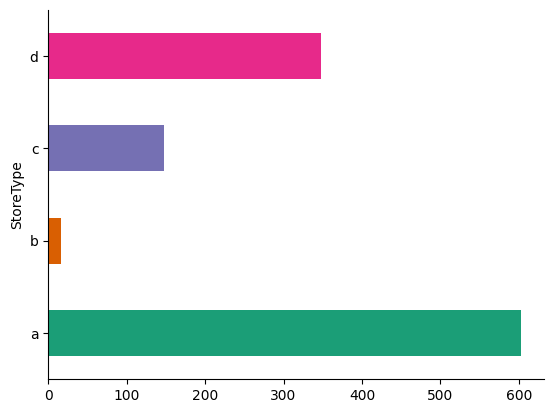

In [34]:
# @title StoreType

from matplotlib import pyplot as plt
import seaborn as sns
store.groupby('StoreType').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

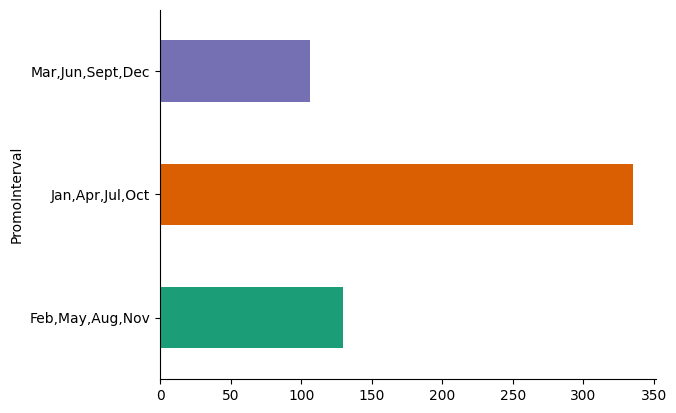

In [33]:
# @title PromoInterval

from matplotlib import pyplot as plt
import seaborn as sns
store.groupby('PromoInterval').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
test.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [35]:
train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


from matplotlib import pyplot as plt
_df_15['Store'].plot(kind='hist', bins=20, title='Store')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16['Sales'].plot(kind='hist', bins=20, title='Sales')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['Customers'].plot(kind='hist', bins=20, title='Customers')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18.plot(kind='scatter', x='Store', y='Sales', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19.plot(kind='scatter', x='Sales', y='Customers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Store']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_20.sort_values('Store', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Store')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Store']
  ys = series['Customers']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_21.sort_values('Store', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Store')
_ = plt.ylabel('Customers')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Store']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Store'}, axis=1)
              .sort_values('Store', ascending=True))
  xs = counted['Store']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_22.sort_values('Store', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Store')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['DayOfWeek']
  ys = series['Sales']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_23.sort_values('DayOfWeek', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('DayOfWeek')
_ = plt.ylabel('Sales')

from matplotlib import pyplot as plt
_df_24['Store'].plot(kind='line', figsize=(8, 4), title='Store')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_25['Sales'].plot(kind='line', figsize=(8, 4), title='Sales')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_26['Customers'].plot(kind='line', figsize=(8, 4), title='Customers')
plt.gca().spines[['top', 'right']].set_visible(False)

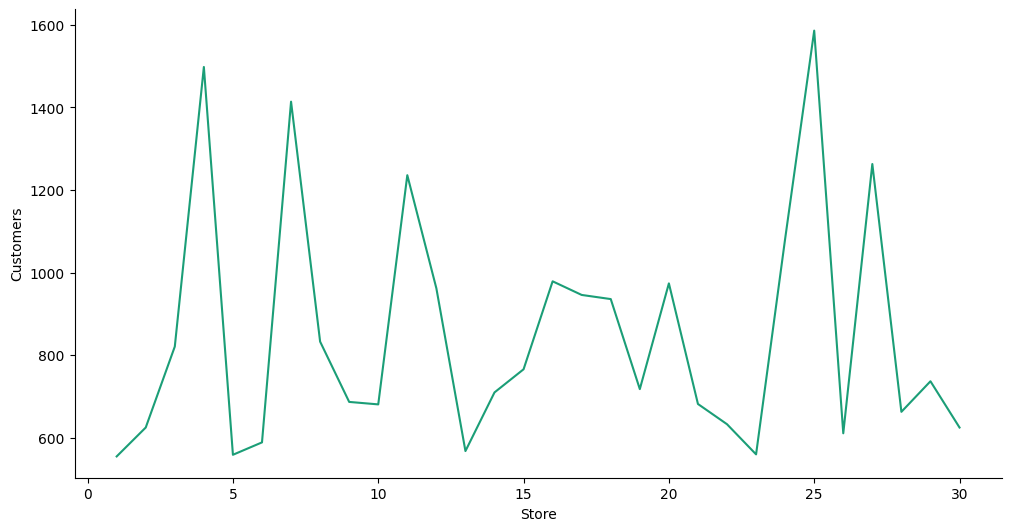

In [31]:
from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Store']
  ys = series['Customers']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('Store', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Store')
_ = plt.ylabel('Customers')

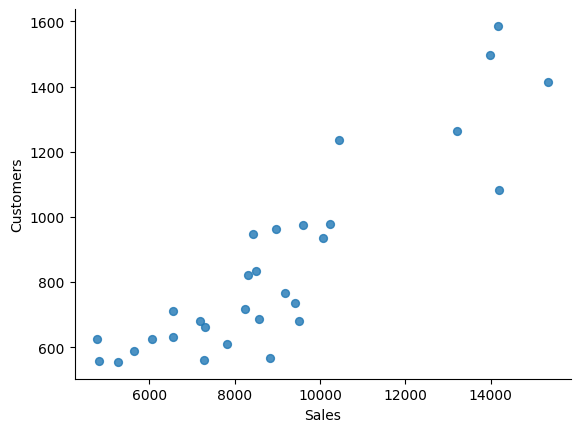

In [30]:
from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='Sales', y='Customers', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [38]:
train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


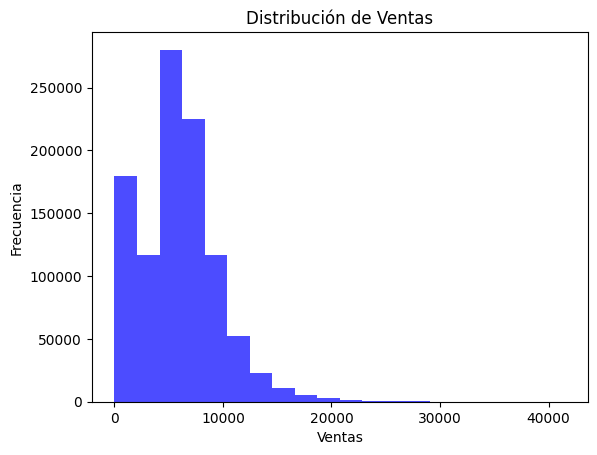

In [39]:
# Veamos la distribución de las ventas utilizando un histograma
plt.hist(train['Sales'], bins=20, color='blue', alpha=0.7)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia')
plt.show()

Error cuadrático medio: 2182114.9405684946


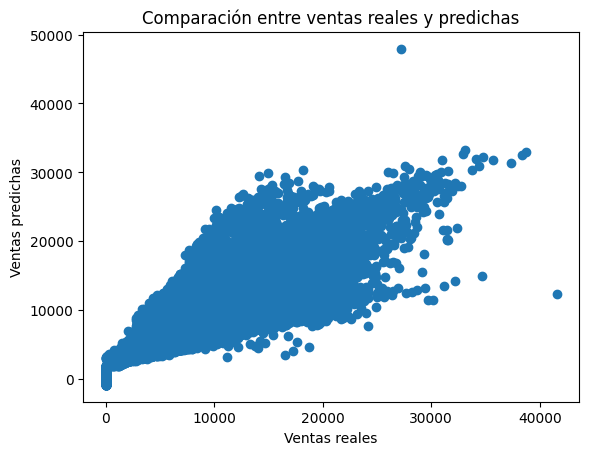

In [43]:
# Probando modelos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

X = train.drop(columns=['Sales', 'Date'], axis=1)
y = train['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

model = LinearRegression()
model.fit(X_train_encoded, y_train)

y_pred = model.predict(X_test_encoded)

mse = mean_squared_error(y_test, y_pred)
print("Error cuadrático medio:", mse)

plt.scatter(y_test, y_pred)
plt.xlabel("Ventas reales")
plt.ylabel("Ventas predichas")
plt.title("Comparación entre ventas reales y predichas")
plt.show()